In [262]:
%matplotlib inline
import pandas as pd
from nltk import word_tokenize, pos_tag, ne_chunk, sent_tokenize, regexp_tokenize
from nltk import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import vader
from sklearn.metrics import accuracy_score

### Variable Assignment

In [35]:
text_alice = """ALICE was beginning to get very tired of sitting by her
sister on the bank, and of having nothing to do: once or twice she had
peeped into the book her sister was reading, but it had no pictures or
conversations in it, "and what is the use of a book," thought Alice,
"without pictures or conversations?"

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid) whether the pleasure of
making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her."""

### Lowercasing 

In [37]:
text = text_alice.lower()
print(text)

alice was beginning to get very tired of sitting by her
sister on the bank, and of having nothing to do: once or twice she had
peeped into the book her sister was reading, but it had no pictures or
conversations in it, "and what is the use of a book," thought alice,
"without pictures or conversations?"

so she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid) whether the pleasure of
making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a white rabbit with pink eyes ran
close by her.


### Counting Items

In [38]:
len(text)

593

### Units of Analysis

#### Characters

In [41]:
characters = [w for w in text if w.isalpha()]
print(characters)

['a', 'l', 'i', 'c', 'e', 'w', 'a', 's', 'b', 'e', 'g', 'i', 'n', 'n', 'i', 'n', 'g', 't', 'o', 'g', 'e', 't', 'v', 'e', 'r', 'y', 't', 'i', 'r', 'e', 'd', 'o', 'f', 's', 'i', 't', 't', 'i', 'n', 'g', 'b', 'y', 'h', 'e', 'r', 's', 'i', 's', 't', 'e', 'r', 'o', 'n', 't', 'h', 'e', 'b', 'a', 'n', 'k', 'a', 'n', 'd', 'o', 'f', 'h', 'a', 'v', 'i', 'n', 'g', 'n', 'o', 't', 'h', 'i', 'n', 'g', 't', 'o', 'd', 'o', 'o', 'n', 'c', 'e', 'o', 'r', 't', 'w', 'i', 'c', 'e', 's', 'h', 'e', 'h', 'a', 'd', 'p', 'e', 'e', 'p', 'e', 'd', 'i', 'n', 't', 'o', 't', 'h', 'e', 'b', 'o', 'o', 'k', 'h', 'e', 'r', 's', 'i', 's', 't', 'e', 'r', 'w', 'a', 's', 'r', 'e', 'a', 'd', 'i', 'n', 'g', 'b', 'u', 't', 'i', 't', 'h', 'a', 'd', 'n', 'o', 'p', 'i', 'c', 't', 'u', 'r', 'e', 's', 'o', 'r', 'c', 'o', 'n', 'v', 'e', 'r', 's', 'a', 't', 'i', 'o', 'n', 's', 'i', 'n', 'i', 't', 'a', 'n', 'd', 'w', 'h', 'a', 't', 'i', 's', 't', 'h', 'e', 'u', 's', 'e', 'o', 'f', 'a', 'b', 'o', 'o', 'k', 't', 'h', 'o', 'u', 'g', 'h',

#### Counting Characters

In [42]:
print(Counter(characters).most_common())

[('e', 56), ('i', 40), ('t', 40), ('o', 36), ('n', 35), ('s', 32), ('a', 31), ('h', 31), ('r', 26), ('d', 21), ('w', 14), ('c', 13), ('g', 13), ('u', 13), ('l', 12), ('b', 11), ('p', 10), ('y', 9), ('f', 7), ('k', 6), ('v', 5), ('m', 3)]


#### Identifying Tokens

In [61]:
tokens = regexp_tokenize(text,pattern='\w+')
print(len(tokens))

113


In [62]:
print(tokens)

['alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', 'thought', 'alice', 'without', 'pictures', 'or', 'conversations', 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', 'as', 'well', 'as', 'she', 'could', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up', 'and', 'picking', 'the', 'daisies', 'when', 'suddenly', 'a', 'white', 'rabbit', 'with', 'pink', 'eyes', 'ran', 'close', 'by', 'her']


#### Counting Tokens

In [44]:
Counter(tokens)

Counter({'a': 3,
         'alice': 2,
         'and': 4,
         'as': 2,
         'bank': 1,
         'be': 1,
         'beginning': 1,
         'book': 2,
         'but': 1,
         'by': 2,
         'chain': 1,
         'close': 1,
         'considering': 1,
         'conversations': 2,
         'could': 1,
         'daisies': 1,
         'daisy': 1,
         'day': 1,
         'do': 1,
         'eyes': 1,
         'feel': 1,
         'for': 1,
         'get': 1,
         'getting': 1,
         'had': 2,
         'having': 1,
         'her': 5,
         'hot': 1,
         'in': 2,
         'into': 1,
         'is': 1,
         'it': 2,
         'made': 1,
         'making': 1,
         'mind': 1,
         'no': 1,
         'nothing': 1,
         'of': 5,
         'on': 1,
         'once': 1,
         'or': 3,
         'own': 1,
         'peeped': 1,
         'picking': 1,
         'pictures': 2,
         'pink': 1,
         'pleasure': 1,
         'rabbit': 1,
         'ran': 1,
 

### Ngrams

Example of [Google Ngram Viewer](https://books.google.com/ngrams)

In [45]:
n = 3
text_ngrams = ['_'.join(ngram) for ngram in ngrams(tokens, n)]
Counter(text_ngrams)

Counter({'a_book_thought': 1,
         'a_daisy_chain': 1,
         'a_white_rabbit': 1,
         'alice_was_beginning': 1,
         'alice_without_pictures': 1,
         'and_of_having': 1,
         'and_picking_the': 1,
         'and_stupid_whether': 1,
         'and_what_is': 1,
         'as_she_could': 1,
         'as_well_as': 1,
         'bank_and_of': 1,
         'be_worth_the': 1,
         'beginning_to_get': 1,
         'book_her_sister': 1,
         'book_thought_alice': 1,
         'but_it_had': 1,
         'by_her_sister': 1,
         'chain_would_be': 1,
         'close_by_her': 1,
         'considering_in_her': 1,
         'conversations_in_it': 1,
         'conversations_so_she': 1,
         'could_for_the': 1,
         'daisies_when_suddenly': 1,
         'daisy_chain_would': 1,
         'day_made_her': 1,
         'do_once_or': 1,
         'eyes_ran_close': 1,
         'feel_very_sleepy': 1,
         'for_the_hot': 1,
         'get_very_tired': 1,
         'getting_up_

### Reducing Complexity

#### Lowercasing

In [64]:
example = 'The Hamburgers prefer to eat their hamburgers without Ketchup'

In [65]:
Counter(example.split())

Counter({'Hamburgers': 1,
         'Ketchup': 1,
         'The': 1,
         'eat': 1,
         'hamburgers': 1,
         'prefer': 1,
         'their': 1,
         'to': 1,
         'without': 1})

In [67]:
Counter(example.lower().split())

Counter({'eat': 1,
         'hamburgers': 2,
         'ketchup': 1,
         'prefer': 1,
         'the': 1,
         'their': 1,
         'to': 1,
         'without': 1})

### Stemming Text

In [55]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()
print(pst.stem('loving'))
print(pst.stem('loved'))

love
love


In [58]:
print([pst.stem(token) for token in word_tokenize('love loved loving flower flowers dogs dog')])

['love', 'love', 'love', 'flower', 'flower', 'dog', 'dog']


In [59]:
print([pst.stem(token) for token in word_tokenize('ran run running')])

['ran', 'run', 'run']


In [ ]:
print(pst.stem('mouse'))
print(pst.stem('mice'))

In [68]:
[pst.stem(token) for token in tokens]

['alic',
 'wa',
 'begin',
 'to',
 'get',
 'veri',
 'tire',
 'of',
 'sit',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 'and',
 'of',
 'have',
 'noth',
 'to',
 'do',
 'onc',
 'or',
 'twice',
 'she',
 'had',
 'peep',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'wa',
 'read',
 'but',
 'it',
 'had',
 'no',
 'pictur',
 'or',
 'convers',
 'in',
 'it',
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 'thought',
 'alic',
 'without',
 'pictur',
 'or',
 'convers',
 'so',
 'she',
 'wa',
 'consid',
 'in',
 'her',
 'own',
 'mind',
 'as',
 'well',
 'as',
 'she',
 'could',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'veri',
 'sleepi',
 'and',
 'stupid',
 'whether',
 'the',
 'pleasur',
 'of',
 'make',
 'a',
 'daisi',
 'chain',
 'would',
 'be',
 'worth',
 'the',
 'troubl',
 'of',
 'get',
 'up',
 'and',
 'pick',
 'the',
 'daisi',
 'when',
 'suddenli',
 'a',
 'white',
 'rabbit',
 'with',
 'pink',
 'eye',
 'ran',
 'close',
 'by',
 'her']

### Lemmatizing text

In [50]:
from nltk.stem.wordnet import WordNetLemmatizer
wlem = WordNetLemmatizer()
print(wlem.lemmatize("flowers",pos='n'))
print(wlem.lemmatize("was",pos='v'))

flower
be


In [51]:
print(wlem.lemmatize("run",pos='v'))
print(wlem.lemmatize("ran",pos='v'))

run
run


In [52]:
print(wlem.lemmatize("mouse",pos='n'))
print(wlem.lemmatize("mice",pos='n'))

mouse
mouse


In [57]:
print(pst.stem('mouse'))
print(pst.stem('mice'))

mous
mice


### Part of Speech Tagging

In [69]:
sentence = "After such a fall as this, I shall think nothing of tumbling down stairs! "
pos_tagged = pos_tag(word_tokenize(text_alice))
print(pos_tagged)

[('ALICE', 'NNP'), ('was', 'VBD'), ('beginning', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('very', 'RB'), ('tired', 'JJ'), ('of', 'IN'), ('sitting', 'VBG'), ('by', 'IN'), ('her', 'PRP$'), ('sister', 'NN'), ('on', 'IN'), ('the', 'DT'), ('bank', 'NN'), (',', ','), ('and', 'CC'), ('of', 'IN'), ('having', 'VBG'), ('nothing', 'NN'), ('to', 'TO'), ('do', 'VB'), (':', ':'), ('once', 'RB'), ('or', 'CC'), ('twice', 'VB'), ('she', 'PRP'), ('had', 'VBD'), ('peeped', 'VBN'), ('into', 'IN'), ('the', 'DT'), ('book', 'NN'), ('her', 'PRP$'), ('sister', 'NN'), ('was', 'VBD'), ('reading', 'VBG'), (',', ','), ('but', 'CC'), ('it', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('pictures', 'NNS'), ('or', 'CC'), ('conversations', 'NNS'), ('in', 'IN'), ('it', 'PRP'), (',', ','), ('``', '``'), ('and', 'CC'), ('what', 'WP'), ('is', 'VBZ'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('a', 'DT'), ('book', 'NN'), (',', ','), ("''", "''"), ('thought', 'VBD'), ('Alice', 'NNP'), (',', ','), ("''", "''"), ('without', 'IN'), ('

### Named Entity Recognition

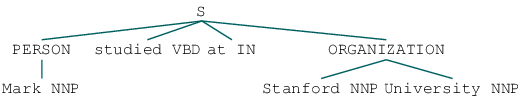

In [70]:
sentence = "Mark studied at Stanford University"
#print(sentence)
ne= ne_chunk(pos_tag(word_tokenize(sentence)))
ne

### From Words to Numbers

In [102]:
corpus = ['This is the first document.',
          'This document is the second.',
          'And this is the third document.',
          'Is this first or the fourth document?']
vectorizer = CountVectorizer(ngram_range=(1,1))
X = vectorizer.fit_transform(corpus)


### Column headers are the features

In [97]:
features = vectorizer.get_feature_names()
print(features)

['and', 'document', 'first', 'fourth', 'is', 'or', 'second', 'the', 'third', 'this']


### Document-term-matrix

In [98]:
pd.DataFrame(X.toarray(),columns=features)

,and,document,first,fourth,is,or,second,the,third,this
0,0,1,1,0,1,0,0,1,0,1
1,0,2,0,0,1,0,1,1,0,1
2,1,1,0,0,1,0,0,1,1,1
3,0,1,1,1,1,1,0,1,0,1


In [133]:
vectorizer = TfidfVectorizer(norm=None,smooth_idf=False) # ,stop_words='english' ngram_range=(1,1)
X = vectorizer.fit_transform(corpus)
features = vectorizer.get_feature_names()
pd.DataFrame(X.toarray(),columns=features)

,and,document,first,fourth,is,or,second,the,third,this
0,0.000000,1.0,1.693147,0.000000,1.0,0.000000,0.000000,1.0,0.000000,1.0
1,0.000000,1.0,0.000000,0.000000,1.0,0.000000,2.386294,1.0,0.000000,1.0
2,2.386294,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,2.386294,1.0
3,0.000000,1.0,1.693147,2.386294,1.0,2.386294,0.000000,1.0,0.000000,1.0


### Example of Tf-Idf (words "document" and "four")

In [125]:
from math import log

# document
tf = 1
idf = log(4 / 4) + 1
tf*idf

1.0

In [135]:
from math import log
import numpy as np

# four
tf = 1
idf = np.log(4 / 1) + 1
tf*idf

2.386294361119891

### Dictionary Methods

[Vader Sentiment Lexicon](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt)

In [136]:
analyzer = vader.SentimentIntensityAnalyzer()
analyzer.polarity_scores(text_alice)

{'compound': 0.3825, 'neg': 0.07, 'neu': 0.848, 'pos': 0.083}

In [139]:
analyzer.polarity_scores(text_alice) # + ':) :-) :P'

{'compound': 0.8675, 'neg': 0.066, 'neu': 0.801, 'pos': 0.134}

### Example Supervised Classification

#### Training

In [184]:
corpus = ['i am so happy today',
         'life is good and pleasant',
         'i want to die because i am sad',
         'i do not want to die life is a blessing',
         'the world is ugly the climate is bad',
         'there is no future for people like me']

In [185]:
y = [1,1,0,1,0,0]

In [246]:
vectorizer = CountVectorizer()#norm=None,smooth_idf=False,ngram_range=(1,1)) # ,stop_words='english' ngram_range=(1,1)
X = vectorizer.fit_transform(corpus)
features = vectorizer.get_feature_names()
df = pd.DataFrame(X.toarray(),columns=features)
df

,am,and,bad,because,bless,climate,die,do,for,future,...,pleasant,sad,so,the,there,to,today,ugly,want,world
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,1,0,1
5,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [253]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Predicting the emotion of new examples

In [254]:
new_sentences = ['white rabbit is happy','alice is sad']
X_new = vectorizer.transform(new_sentences)
classifier.predict(X_new)

array([1, 0])

In [259]:
df['label'] = y
df[df >= 1] = 1
df[['is','happy','sad','label']]

,is,happy,sad,label
0,0,1,0,1
1,1,0,0,1
2,0,0,1,0
3,1,0,0,1
4,1,0,0,0
5,1,0,0,0


In [258]:
# white, rabbit, is, happy
#pos = (0.001/6)*(0.001/6)*(0.001/6)*(2.001/6)*(1.001/6)
#neg = (1.001/6)*(0.001/6)*(0.001/6)*(1.001/6)*(0.001/6)
# alice, is, sad
pos=(0.01/6)*(2.01/6)*(0.01/6)*(0.01/6)*(0.01/6)
neg=(0.01/6)*(2.01/6)*(0.01/6)*(1.01/6)*(0.01/6)
print(pos,neg)
prob_pos = pos / (pos + neg)
prob_neg = neg / (pos + neg)
print(prob_pos,prob_neg)


2.5848765432098773e-12 2.610725308641976e-10
0.009803921568627453 0.9901960784313726


### Validation

In [294]:
corpus_test = ['i am so happy because i did not die',
        'yesterday i was sad now i am delighted by your presence',
        'i wish for the apocalyps',
       'because of global warming there is no future']

y_test = [1,1,0,0]

In [295]:
X_test = vectorizer.transform(corpus_test)
predictions = classifier.predict(X_test)
print(predictions)

[1 0 0 0]


In [296]:
accuracy_score(predictions,y_test)

0.75